QUESTION:

How would you find the odds of rolling 21 or higher on 6 dice using a computer?


**Monte Carlo simulations** - rather than try and compute the odds using statistics, just simulate a situation a lot of times and see what you get.



In [2]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.charts import Histogram
import random


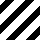
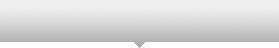
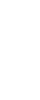
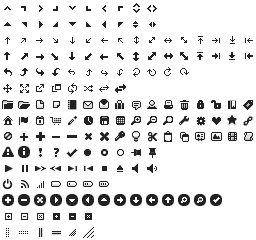
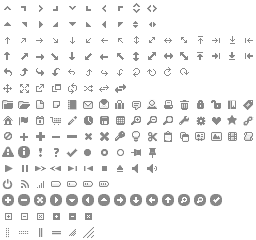
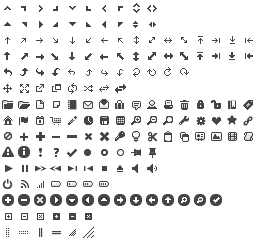
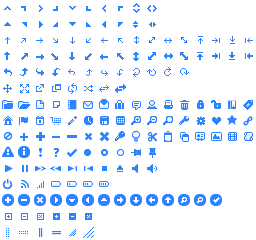
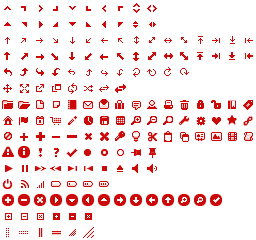
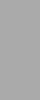
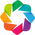
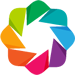
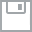
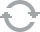
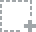
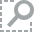
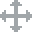
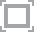
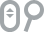

In [3]:
output_notebook()

The `random` module gives a lot of ways for working with random numbers

We can actually create our own random number generators

In [36]:
def rng(seed=1):
    def rand():
        nonlocal seed
        seed = (7 * seed) % 101
#         print("Seed: {}".format(seed))
        return (seed - 1) % 10 + 1
    
    return rand

my_rand = rng(135135)

In [34]:
print(my_rand())
print(my_rand())
print(my_rand())


Seed: 46
6
Seed: 19
9
Seed: 32
2


In [8]:
print(seed)

NameError: name 'seed' is not defined

In [37]:
for _ in range(100):
    print(my_rand())

10
5
2
9
9
8
3
9
1
7
9
10
8
1
5
10
4
7
5
1
4
5
10
9
1
3
5
2
4
3
6
7
8
10
10
6
7
3
6
2
2
8
4
4
5
5
3
9
7
3
1
6
9
2
2
3
8
2
10
4
2
1
3
10
6
1
7
4
6
10
7
6
1
2
10
8
6
9
7
8
5
4
3
1
1
5
4
8
5
9
9
3
7
7
6
6
8
2
4
8


In [43]:
nums = [rand() for _ in range(200)]
print(nums)

[9, 9, 8, 3, 9, 1, 7, 9, 10, 8, 1, 5, 10, 4, 7, 5, 1, 4, 5, 10, 9, 1, 3, 5, 2, 4, 3, 6, 7, 8, 10, 10, 6, 7, 3, 6, 2, 2, 8, 4, 4, 5, 5, 3, 9, 7, 3, 1, 6, 9, 2, 2, 3, 8, 2, 10, 4, 2, 1, 3, 10, 6, 1, 7, 4, 6, 10, 7, 6, 1, 2, 10, 8, 6, 9, 7, 8, 5, 4, 3, 1, 1, 5, 4, 8, 5, 9, 9, 3, 7, 7, 6, 6, 8, 2, 4, 8, 10, 5, 2, 9, 9, 8, 3, 9, 1, 7, 9, 10, 8, 1, 5, 10, 4, 7, 5, 1, 4, 5, 10, 9, 1, 3, 5, 2, 4, 3, 6, 7, 8, 10, 10, 6, 7, 3, 6, 2, 2, 8, 4, 4, 5, 5, 3, 9, 7, 3, 1, 6, 9, 2, 2, 3, 8, 2, 10, 4, 2, 1, 3, 10, 6, 1, 7, 4, 6, 10, 7, 6, 1, 2, 10, 8, 6, 9, 7, 8, 5, 4, 3, 1, 1, 5, 4, 8, 5, 9, 9, 3, 7, 7, 6, 6, 8, 2, 4, 8, 10, 5, 2]


In [39]:
hist = Histogram(nums, bins=10, notebook=True, tools=False, 
                 title="My RNG", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

ERROR:/Users/james/src/github.com/tiyd-python-2015-08/course-resources/.direnv/python-3.4.3/lib/python3.4/site-packages/bokeh/validation/check.py:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: e97aead9-8088-46cf-bfc4-9fb8d272ad6b


A histogram should raise red flags - it's too perfect

We could look at a "better" random number generator



In [44]:
def bsd_rand(seed):
   def rand():
      nonlocal seed
      seed = (1103515245*seed + 12345) & 0x7fffffff
      return seed / 2147483647
   return rand

In [45]:
rand = bsd_rand(1)
nums = [rand() for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, title="bsd_rand", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

ERROR:/Users/james/src/github.com/tiyd-python-2015-08/course-resources/.direnv/python-3.4.3/lib/python3.4/site-packages/bokeh/validation/check.py:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 37e85562-4aa3-40b5-8fd6-6029c8daa6e3


In [46]:
nums = [rand() for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, title="bsd_rand", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

ERROR:/Users/james/src/github.com/tiyd-python-2015-08/course-resources/.direnv/python-3.4.3/lib/python3.4/site-packages/bokeh/validation/check.py:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 3d8f7bb8-a844-421a-a4da-07f931d674a0


In [47]:
import random

random.seed(1)

[random.random() for _ in range(5)]

[0.13436424411240122,
 0.8474337369372327,
 0.763774618976614,
 0.2550690257394217,
 0.49543508709194095]

In [48]:
random.seed(1)

[random.random() for _ in range(5)]

[0.13436424411240122,
 0.8474337369372327,
 0.763774618976614,
 0.2550690257394217,
 0.49543508709194095]

In [49]:
[random.random() for _ in range(5)]

[0.4494910647887381,
 0.651592972722763,
 0.7887233511355132,
 0.0938595867742349,
 0.02834747652200631]

In [50]:
[random.random() for _ in range(5)]

[0.8357651039198697,
 0.43276706790505337,
 0.762280082457942,
 0.0021060533511106927,
 0.4453871940548014]

In [51]:
random.seed(1)

[random.random() for _ in range(5)]

[0.13436424411240122,
 0.8474337369372327,
 0.763774618976614,
 0.2550690257394217,
 0.49543508709194095]

In [52]:
nums = [random.random() for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.random", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

ERROR:/Users/james/src/github.com/tiyd-python-2015-08/course-resources/.direnv/python-3.4.3/lib/python3.4/site-packages/bokeh/validation/check.py:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 40f35738-d387-4b0a-9dee-e75eacb95da1


In [53]:
nums = [random.triangular(0, 1) for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.triangular", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

ERROR:/Users/james/src/github.com/tiyd-python-2015-08/course-resources/.direnv/python-3.4.3/lib/python3.4/site-packages/bokeh/validation/check.py:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 16c8ab04-a10e-46a3-acb5-84c8c5a3dbec


In [54]:
nums = [random.gauss(0.5, 0.5) for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.gauss", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

ERROR:/Users/james/src/github.com/tiyd-python-2015-08/course-resources/.direnv/python-3.4.3/lib/python3.4/site-packages/bokeh/validation/check.py:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 698708f6-f4fd-4e5a-a3f9-368fdcfcc0dc


In [55]:
nums = [random.expovariate(2) for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.expovariate", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

ERROR:/Users/james/src/github.com/tiyd-python-2015-08/course-resources/.direnv/python-3.4.3/lib/python3.4/site-packages/bokeh/validation/check.py:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: c452ff35-bdea-45c2-97a7-7f755a7cec13


## requirements.txt

`pip install -r requirements.txt`
